# Задание 1

In [135]:
# https://scikit-learn.org/stable/install.html

!pip install scikit-learn

In [136]:
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0.1']
del dataset['Unnamed: 0']

In [137]:
dataset.head()

,age,job_cl,marital_cl,education_cl,default_cl,housing_cl,loan_cl,contact_cl,month_cl,day_of_week_cl,...,campaign,pdays,previous,poutcome_cl,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_cl
0,35,0,1,0,0,0,0,0,2,3,...,1,999,1,1,-1.8,92.893,-46.2,1.266,5099.1,0
1,42,2,0,3,0,1,0,1,2,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,1
2,36,0,0,0,0,1,0,0,5,0,...,2,999,0,0,1.4,93.444,-36.1,4.965,5228.1,1
3,37,0,0,1,0,0,1,1,4,2,...,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1,1
4,31,4,1,0,0,0,0,0,1,3,...,1,999,0,0,-1.8,93.075,-47.1,1.365,5099.1,0


In [138]:
dataset.describe()

,age,job_cl,marital_cl,education_cl,default_cl,housing_cl,loan_cl,contact_cl,month_cl,day_of_week_cl,...,campaign,pdays,previous,poutcome_cl,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_cl
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,...,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.458836,2.638578,0.529203,1.774677,0.161961,0.491487,0.194720,0.286099,3.698276,1.986746,...,2.320905,888.347198,0.316703,0.324784,-0.492748,93.482002,-40.181897,2.968123,5135.510938,0.500000
std,11.963006,2.822053,0.688934,1.790512,0.368435,0.544924,0.451452,0.451961,2.204815,1.395085,...,2.294474,312.500496,0.699808,0.651716,1.723356,0.634630,5.359290,1.890823,87.040463,0.500027
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,999.000000,0.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000,0.000000
50%,38.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,2.000000,999.000000,0.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000,0.500000
75%,48.000000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,...,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000,1.000000
max,98.000000,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,35.000000,999.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [139]:
dataset["y_cl"].unique()

array([0, 1])

In [140]:
dataset_2 = dataset.drop(['marital_cl',
                                  'education_cl', 'default_cl',\
                                  'housing_cl', 'loan_cl',\
                                  'contact_cl', 'month_cl',\
                                  'day_of_week_cl', 'job_cl',\
                                  'poutcome_cl'], axis=1)

In [141]:
X = dataset_2.iloc[:, :-1].values
y = dataset_2["y_cl"]

In [142]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Разбитие на обучающие и тестовые выборки

In [143]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Стандартизация и подготовка данных

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [144]:
X_train

array([[-0.53673455,  0.3423023 , -0.56939349, ..., -0.30213001,
         1.00693366,  1.0663203 ],
       [-0.37156835, -0.96054976, -0.56939349, ..., -1.12076833,
        -0.86543724, -0.41344427],
       [-0.78448387,  1.79958725,  0.29488319, ..., -1.28821708,
        -0.82416996, -0.41344427],
       ...,
       [-0.78448387, -0.89877661, -0.56939349, ..., -1.12076833,
        -0.89771038, -0.41344427],
       [-0.78448387,  1.39244598,  1.15915987, ..., -1.28821708,
        -0.82416996, -0.41344427],
       [-0.70190076, -0.84261919, -0.56939349, ..., -0.33934084,
         0.62970833,  0.6958056 ]])

# Классификация

**Классификация** — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

**Классифицировать объект** — значит, указать номер (или наименование класса), к которому относится данный объект.


## Формальные постановки задачи классификации

### **Классическая постановка**
Пусть $X$ — множество описаний объектов, $Y$ — конечное множество номеров (имён, меток) классов. Существует неизвестная целевая зависимость — отображение $y^{*}:\; X\to Y$, значения которой известны только на объектах конечной обучающей выборки $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$. Требуется построить алгоритм $a:\; X\to Y$, способный классифицировать произвольный объект $x \in X$.

### **Вероятностная постановка**
Более общей считается вероятностная постановка задачи. Предполагается, что множество пар «объект, класс» $X \times Y$ является вероятностным пространством с неизвестной вероятностной мерой $\mathsf P$. Имеется конечная обучающая выборка наблюдений $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$, сгенерированная согласно вероятностной мере $\mathsf P$. Требуется построить алгоритм $a:\; X\to Y$, способный классифицировать произвольный объект $x \in X$.

## Метод k-ближайших соседей (K-Nearest Neighbors)

Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=21)
clf.fit(X_train, y_train) # алгоритм оценки для классификатора

KNeighborsClassifier(n_neighbors=21)

In [146]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[[794 150]
 [104 808]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       944
           1       0.84      0.89      0.86       912

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856



## Классификатор дерева решений (Decision Tree Classifier)

Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом. Если объединить несколько подобных деревьев решений, то получится так называемый Случайный Лес (англ. Random Forest).

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [147]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [148]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[792 152]
 [146 766]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       944
           1       0.83      0.84      0.84       912

    accuracy                           0.84      1856
   macro avg       0.84      0.84      0.84      1856
weighted avg       0.84      0.84      0.84      1856



## Наивный байесовский классификатор (Naive Bayes)

Такой классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

Каждый параметр классифицируемого объекта считается независимым от других параметров.

https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

In [149]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [150]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[769 175]
 [233 679]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       944
           1       0.80      0.74      0.77       912

    accuracy                           0.78      1856
   macro avg       0.78      0.78      0.78      1856
weighted avg       0.78      0.78      0.78      1856



## Метод опорных векторов (Support Vector Machines)

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [151]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [152]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[778 166]
 [ 78 834]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       944
           1       0.83      0.91      0.87       912

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



## Логистическая регрессия (Logistic Regression)




Логистическая регрессия выводит прогнозы о точках в бинарном масштабе — нулевом или единичном. Если значение чего-либо равно либо больше 0.5, то объект классифицируется в большую сторону (к единице). Если значение меньше 0.5 — в меньшую (к нулю).

У каждого признака есть своя метка, равная только 0 или только 1. Логистическая регрессия является линейным классификатором и поэтому используется, когда в данных прослеживается какая-то линейная зависимость.

https://ru.wikipedia.org/wiki/Логистическая_регрессия

In [153]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[792 152]
 [148 764]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       944
           1       0.83      0.84      0.84       912

    accuracy                           0.84      1856
   macro avg       0.84      0.84      0.84      1856
weighted avg       0.84      0.84      0.84      1856



## from sklearn.linear_model import Perceptron

In [155]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

# Разделение выборки

In [156]:
import pandas as pd

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [157]:
dataset_2 = dataset.drop(['marital_cl',
                                  'education_cl', 'default_cl',\
                                  'housing_cl', 'loan_cl',\
                                  'contact_cl', 'month_cl',\
                                  'day_of_week_cl', 'job_cl',\
                                  'poutcome_cl'], axis=1)

In [158]:
X = dataset_2.iloc[:, :-1].values
y = dataset_2["y_cl"]

In [159]:
from sklearn.model_selection import train_test_split

from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([3747, 3677])
dict_values([893, 963])


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([3712, 3712])
dict_values([928, 928])


# Кросс-валидация

In [161]:
import pandas as pd

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [162]:
dataset_2 = dataset.drop(['marital_cl',
                                  'education_cl', 'default_cl',\
                                  'housing_cl', 'loan_cl',\
                                  'contact_cl', 'month_cl',\
                                  'day_of_week_cl', 'job_cl',\
                                  'poutcome_cl'], axis=1)

In [163]:
X = dataset_2.iloc[:, :-1].values
y = dataset_2["y_cl"]

In [164]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [1754 1758 1760 ... 9277 9278 9279] TEST: [   0    1    2 ... 1959 1961 1963]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [1754 1758 1760 ... 3777 3779 3780]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [3645 3646 3648 ... 5608 5609 5610]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [5528 5529 5530 ... 7439 7440 7442]
TRAIN: [   0    1    2 ... 7439 7440 7442] TEST: [7405 7408 7410 ... 9277 9278 9279]


In [165]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       928
           1       0.84      0.87      0.85       928

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856

0.8502155172413793
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       928
           1       0.84      0.89      0.87       928

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856

0.8620689655172413
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       928
           1       0.85      0.85      0.85       928

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85   

# Подбор гиперпараметров

In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

parameters = { 'n_neighbors': np.arange(1, 21, 1) }

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.best_params_

clf.cv_results_

{'mean_fit_time': array([0.00830274, 0.00785151, 0.01201181, 0.01674457, 0.01311054,
        0.01440907, 0.01391196, 0.01192183, 0.01458764, 0.02078609,
        0.01823545, 0.01934443, 0.0160882 , 0.01283817, 0.01538358,
        0.0194489 , 0.01764803, 0.01561608, 0.02786264, 0.02119727]),
 'mean_score_time': array([0.05390363, 0.05305929, 0.09416418, 0.09465508, 0.11051426,
        0.11546516, 0.13658037, 0.11874728, 0.11547055, 0.1325778 ,
        0.12924609, 0.16098013, 0.12835231, 0.12808022, 0.13801985,
        0.18534136, 0.17099943, 0.14181271, 0.20686469, 0.21042686]),
 'mean_test_score': array([0.81721365, 0.79485366, 0.8378227 , 0.83149156, 0.84725122,
        0.84267191, 0.85263897, 0.85088885, 0.85452476, 0.8541219 ,
        0.85775854, 0.85533375, 0.85735432, 0.85506466, 0.85668055,
        0.85425595, 0.85762268, 0.85654542, 0.85748836, 0.8553333 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                    17, 18,

In [167]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.score(X_test, y_test))

[[780 148]
 [ 99 829]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       928
           1       0.85      0.89      0.87       928

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856

0.8669181034482759


# Задание 2

In [384]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score
from scipy.stats import mode
import matplotlib.pyplot as plt

In [385]:
Loss = ({'model' : [], 'test_accuracy' : [], 'test_recall' :[] , 'test_auc' :[]}) #Датафрейм для метрик качества
df_Loss = pd.DataFrame(Loss)

In [386]:
dataset_2 = dataset.drop(['marital_cl',
                                  'education_cl', 'default_cl',\
                                  'housing_cl', 'loan_cl',\
                                  'contact_cl', 'month_cl',\
                                  'day_of_week_cl', 'job_cl',\
                                  'poutcome_cl'], axis=1)

In [387]:
X = dataset_2.iloc[:, :-1].values
y = dataset_2["y_cl"]

In [388]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [389]:
def loss_func(df, model, y_test, y_pred):  # функция для оценки качества обученной модели
  te_ac = accuracy_score(y_test, y_pred).round(4)
  te_rec = recall_score(y_test, y_pred).round(4)
  te_auc = roc_auc_score(y_test, y_pred).round(4)
  new_row = {'model' : model, 'test_accuracy' : te_ac, 'test_recall' : te_rec, 'test_auc' : te_auc}
  print("model: {0}".format(model), "test_accuracy: {0}".format(te_ac), "test_recall: {0}".format(te_rec), "test_auc: {0}".format(te_auc), sep='\n')

## KNN

Шаг 1. Выяснить соответствующее метрику расстояния для расчета расстояния между точками данных.

Шаг 2. Сохранить расстояние в массиве и рассортировать его в соответствии с порученным порядком их расстояний.

Шаг 3. Выберите первые элементы K в отсортированном списке.

Шаг 4. Выполните голосование большинства, и класс с максимальным количеством вхождений будет назначен в качестве нового класса для точки данных для классификации.

In [373]:
def euclidian_metric(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [374]:
def predict(x_train, y, x_input, k):
    op_labels = []
    y = np.array(y)
    #Перебрать точки данных, которые нужно классифицировать
    for item in x_input: 
        
        #Массив для хранения расстояний
        point_dist = []
        
        #Пройтись по точкам дынных, которые нужно классифицировать
        for j in range(len(x_train)): 
            distances = euclidian_metric(np.array(x_train[j,:]) , item) 
            #Измерение расстояния
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        
        #Сортировка массива с сохранением индекса
        #Сохранение первых K точек данных
        dist = np.argsort(point_dist)[:k] #Возвращает индексы, которые будут сортировать массив
        
        # Метки K точек данных сверху
        labels = y[dist]
        
        #Выполните голосование большинства
        lab = mode(labels) #Возвращает наиболее встречающееся значение
        lab = lab.mode[0]
        op_labels.append(lab)

    return op_labels

In [375]:
y_pred_knn = predict(X_train, y_train, X_test , 21)

In [376]:
loss_func(df_Loss, "KNN", y_test, y_pred_knn)

model: KNN
test_accuracy: 0.8642
test_recall: 0.9001
test_auc: 0.8642


## Naive Bayes

In [405]:
#Разбиваем выборку на обучающую тестовую
X = dataset_2.drop(columns=['y_cl'])
y = dataset_2['y_cl']
(X_train, X_test, 
y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.3, 
                                     random_state=dataset_2.shape[0], stratify = y)

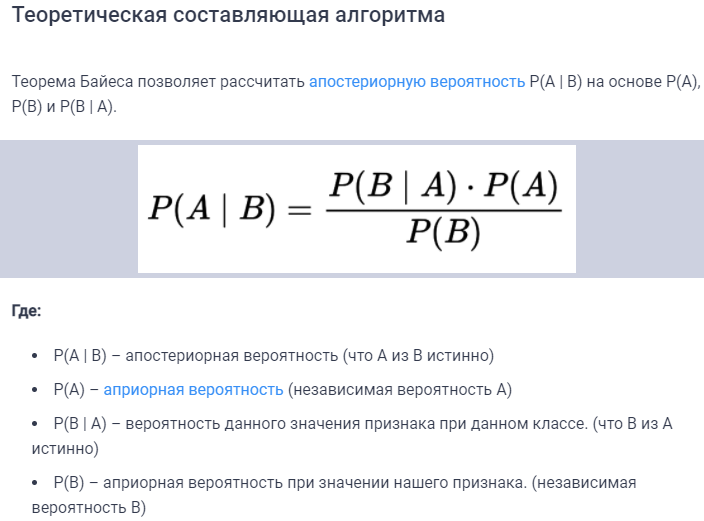

In [412]:
means = X_train.groupby(y_train).apply(np.mean)
standards = X_train.groupby(y_train).apply(np.std)
 
#Априорная вероятность - вероятность, присвоенная событию при отсутствии знания,
#поддерживающего его наступление
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
op_labels = []
#каждый элемент в тестовой части данных
for elem in range(X_test.shape[0]):
   p = {}
   #для каждого возможного класса
   for classes in np.unique(y_train):
       #априорная вероятность взятого ранее класса
       p[classes] = probs.iloc[classes]
       #для каждого столбца в датасете
       for index, parametres in enumerate(X_test.iloc[elem]):
           #умножаем вероятность того, что данное значение столбца
           #будет принадлежать распределению для выбранного класса
           p[classes] *= np.exp((-((parametres - means.iloc[classes, index])/standards.iloc[classes, index])**2)/2)/((2*3.1416)**0.5) # плотность вероятности для нормы
   op_labels.append(pd.Series(p).values.argmax())

In [413]:
loss_func(df_Loss, "Naive Bayes", y_test, op_labels)

model: Naive Bayes
test_accuracy: 0.7665
test_recall: 0.8649
test_auc: 0.7665


# Результаты

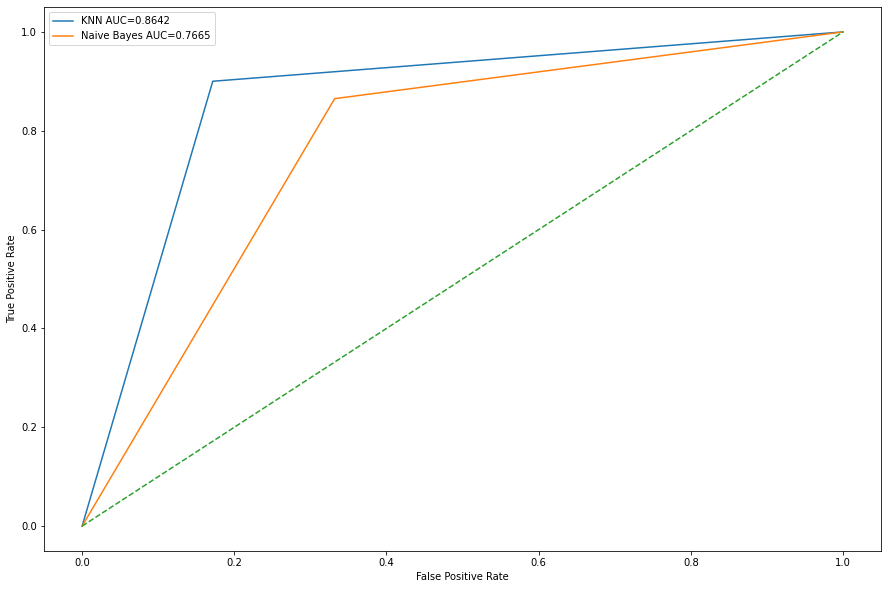

In [404]:
plt.figure(figsize = (15,10))
models = ['KNN', 'Naive Bayes']
y_native = []
y_native.append(y_pred_knn)
y_native.append(y_pred_NB)
for n in range(len(y_native)):
    fpr, tpr, _ = roc_curve(y_test, y_native[n])
    auc = roc_auc_score(y_test, y_native[n])
    lw = 1.5
    plt.plot(fpr,tpr,label=str(models[n])+" AUC="+str(auc.round(4)),lw=lw)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)
plt.show()